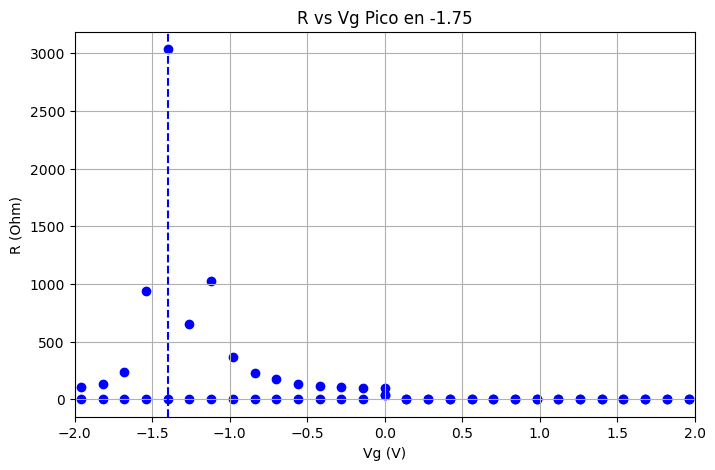

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

archivo = "OFET_Vsd50uV_Voltaje_sd_Fijo_100pts_Vgate7V.txt"
df = pd.read_csv(archivo, sep="\t", header=None)

# Supongamos que df ya tiene tus datos
# Seleccionar columnas 2 y 4
x = df.iloc[:, 3]  # segunda columna
y = df.iloc[:, 9]  # cuarta columna

# Convertir a numérico por si hay strings
x = pd.to_numeric(x, errors='coerce')
y = np.abs(pd.to_numeric(y, errors='coerce')/100)

# Graficar
plt.figure(figsize=(8, 5))
plt.scatter(x, y, marker='o', linestyle='-', color='blue')
plt.xlim(-2, 2)
plt.axvline(x=-1.4, color="blue", linestyle="--", label="G'")
plt.ylabel('R (Ohm)')
plt.xlabel('Vg (V)')
plt.title('R vs Vg, Pico en -1.4 V')
plt.grid(True)
plt.savefig("RvsVg.png")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
import itertools

# === CONFIGURACIÓN ===
carpeta_entrada = r"Medidas con Vgate muestra 4 puntas contactadas 16 10 25\OFET"  # Cambia por tu ruta
carpeta_salida = os.path.join(carpeta_entrada, "graficas_puntos")

os.makedirs(carpeta_salida, exist_ok=True)

archivos = glob(os.path.join(carpeta_entrada, "*.txt"))
print(f"Se encontraron {len(archivos)} archivos.")

# Colores para la gráfica combinada
colores = itertools.cycle(plt.cm.tab10.colors)

# === FIGURA COMBINADA ===
plt.figure(figsize=(10, 6))

for archivo in archivos:
    try:
        # Leer archivo
        df = pd.read_csv(archivo, sep="\t", header=None)

        # Extraer columnas 5 y 15 (índices 4 y 14)
        x = pd.to_numeric(df.iloc[:, 3], errors='coerce')
        y = np.abs(pd.to_numeric(df.iloc[:, 9], errors='coerce'))/10

        # Eliminar NaN
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask].values
        y = y[mask].values

        if len(x) < 1:
            print(f"Archivo {archivo} omitido (datos insuficientes).")
            continue

        nombre_base = os.path.splitext(os.path.basename(archivo))[0]

        # === Gráfica individual ===
        plt_ind = plt.figure(figsize=(8, 6))
        plt.scatter(x, y, s=20, alpha=0.7)
        plt.xlabel("Vg(V)")
        plt.ylabel("Rxx(Ohm)")
        plt.title(f"Puntos - {nombre_base}")
        plt.grid(True)

        salida_ind = os.path.join(carpeta_salida, f"{nombre_base}_puntos.png")
        plt.savefig(salida_ind, dpi=300, bbox_inches="tight")
        plt.close(plt_ind)

        # === Agregar al combinado ===
        color = next(colores)
        plt.scatter(x, y, s=20, alpha=0.7, label=nombre_base, color=color)

    except Exception as e:
        print(f"❌ Error procesando {archivo}: {e}")

# === Config final de la figura combinada ===
plt.xlabel("Vg(V)")
plt.ylabel("Rxx(Ohm)")
plt.title("Datos sobrelapados")
plt.xlim(-2, 2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

salida_combinada = os.path.join(carpeta_salida, "puntos_combinados.png")
plt.savefig(salida_combinada, dpi=300, bbox_inches="tight")
plt.show()

print(f"\n📊 Gráficas individuales guardadas en: {carpeta_salida}")
print(f"📊 Gráfica combinada guardada en: {salida_combinada}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
import itertools

# === CONFIGURACIÓN ===
carpeta_entrada = r"Medidas con Vgate muestra 4 puntas contactadas 16 10 25\OFET"  # Cambia por tu ruta
carpeta_salida = os.path.join(carpeta_entrada, "graficas_puntos")

os.makedirs(carpeta_salida, exist_ok=True)

archivos = glob(os.path.join(carpeta_entrada, "*.txt"))
print(f"Se encontraron {len(archivos)} archivos.")

# Colores para la gráfica combinada
colores = itertools.cycle(plt.cm.tab10.colors)

# === FIGURA COMBINADA ===
plt.figure(figsize=(10, 6))

for archivo in archivos:
    try:
        # Leer archivo
        df = pd.read_csv(archivo, sep="\t", header=None)

        # Extraer columnas 5 y 15 (índices 4 y 14)
        x = pd.to_numeric(df.iloc[:, 3], errors='coerce')
        y = np.abs(pd.to_numeric(df.iloc[:, 9], errors='coerce'))

        # Eliminar NaN
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask].values
        y = y[mask].values

        if len(x) < 1:
            print(f"Archivo {archivo} omitido (datos insuficientes).")
            continue

        nombre_base = os.path.splitext(os.path.basename(archivo))[0]

        # === Gráfica individual ===
        plt_ind = plt.figure(figsize=(8, 6))
        plt.scatter(x, y, s=20, alpha=0.7)
        plt.xlabel("Vg(V)")
        plt.ylabel("Rxx(Ohm)")
        plt.title(f"Puntos - {nombre_base}")
        plt.grid(True)

        salida_ind = os.path.join(carpeta_salida, f"{nombre_base}_puntos.png")
        plt.savefig(salida_ind, dpi=300, bbox_inches="tight")
        plt.close(plt_ind)

        # === Agregar al combinado ===
        color = next(colores)
        plt.scatter(x, y, s=20, alpha=0.7, label=nombre_base, color=color)

    except Exception as e:
        print(f"❌ Error procesando {archivo}: {e}")

# === Config final de la figura combinada ===
plt.xlabel("Vg(V)")
plt.ylabel("Rxx(Ohm)")
plt.title("Datos sobrelapados")
plt.xlim(-2, 2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

salida_combinada = os.path.join(carpeta_salida, "puntos_combinados.png")
plt.savefig(salida_combinada, dpi=300, bbox_inches="tight")
plt.show()

print(f"\n📊 Gráficas individuales guardadas en: {carpeta_salida}")
print(f"📊 Gráfica combinada guardada en: {salida_combinada}")

Se encontraron 34 archivos.


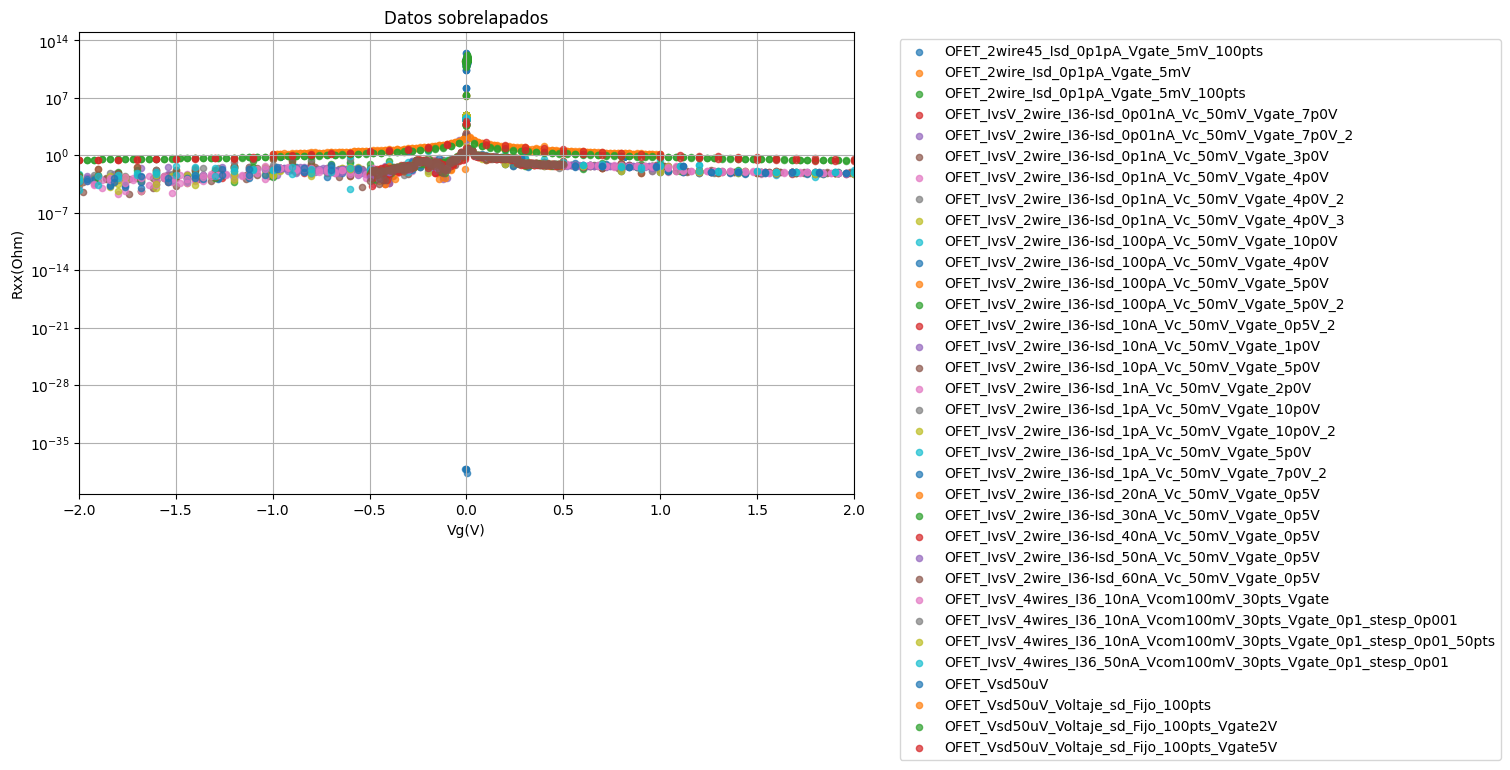


,📊 Gráficas individuales guardadas en: C:\Users\theye\Downloads\Medidas 4 puntas 22-10-2025\OFET\graficas_puntos
,📊 Gráfica combinada guardada en: C:\Users\theye\Downloads\Medidas 4 puntas 22-10-2025\OFET\graficas_puntos\puntos_combinados.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
import itertools

# === CONFIGURACIÓN ===
carpeta_entrada = r"C:\Users\theye\Downloads\Medidas 4 puntas 22-10-2025\OFET"  # Cambia por tu ruta
carpeta_salida = os.path.join(carpeta_entrada, "graficas_puntos")

os.makedirs(carpeta_salida, exist_ok=True)

archivos = glob(os.path.join(carpeta_entrada, "*.txt"))
print(f"Se encontraron {len(archivos)} archivos.")

# Colores para la gráfica combinada
colores = itertools.cycle(plt.cm.tab10.colors)

# === FIGURA COMBINADA ===
plt.figure(figsize=(10, 6))

for archivo in archivos:
    try:
        # Leer archivo
        df = pd.read_csv(archivo, sep="\t", header=None)

        # Extraer columnas 5 y 15 (índices 4 y 14)
        x = pd.to_numeric(df.iloc[:, 3], errors='coerce')
        y = np.abs(pd.to_numeric(df.iloc[:, 9], errors='coerce'))

        # Eliminar NaN
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask].values
        y = y[mask].values

        if len(x) < 1:
            print(f"Archivo {archivo} omitido (datos insuficientes).")
            continue

        nombre_base = os.path.splitext(os.path.basename(archivo))[0]

        # === Gráfica individual ===
        plt_ind = plt.figure(figsize=(8, 6))
        plt.scatter(x, y, s=20, alpha=0.7)
        plt.xlabel("Vg(V)")
        plt.ylabel("Rxx(Ohm)")
        plt.title(f"Puntos - {nombre_base}")
        plt.grid(True)

        salida_ind = os.path.join(carpeta_salida, f"{nombre_base}_puntos.png")
        plt.savefig(salida_ind, dpi=300, bbox_inches="tight")
        plt.close(plt_ind)

        # === Agregar al combinado ===
        color = next(colores)
        plt.scatter(x, y, s=20, alpha=0.7, label=nombre_base, color=color)

    except Exception as e:
        print(f"❌ Error procesando {archivo}: {e}")

# === Config final de la figura combinada ===
plt.xlabel("Vg(V)")
plt.ylabel("Rxx(Ohm)")
plt.title("Datos sobrelapados")
plt.xlim(-2, 2)
plt.yscale("log")   
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

salida_combinada = os.path.join(carpeta_salida, "puntos_combinados.png")
plt.savefig(salida_combinada, dpi=300, bbox_inches="tight")
plt.show()

print(f"\n📊 Gráficas individuales guardadas en: {carpeta_salida}")
print(f"📊 Gráfica combinada guardada en: {salida_combinada}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

archivo = "OFET_Vsd50uV_Voltaje_sd_Fijo_100pts_Vgate7V.csv"
df = pd.read_csv(archivo, sep="\t", header=None)

        # Extraer columnas 5 y 15 (índices 4 y 14)
    x = pd.to_numeric(df.iloc[:, 3], errors='coerce')
    y = np.abs(pd.to_numeric(df.iloc[:, 9], errors='coerce'))/10

        # Eliminar NaN
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask].values
    y = y[mask].values

    if len(x) < 1:
          print(f"Archivo {archivo} omitido (datos insuficientes).")
          continue

     nombre_base = os.path.splitext(os.path.basename(archivo))[0]

        # === Gráfica individual ===
    plt_ind = plt.figure(figsize=(8, 6))
    plt.scatter(x, y, s=20, alpha=0.7)
    plt.xlabel("Vg(V)")
    plt.ylabel("Rxx(Ohm)")
    plt.title(f"Puntos - {nombre_base}")
    plt.grid(True)

    salida_ind = os.path.join(carpeta_salida, f"{nombre_base}_puntos.png")
    plt.savefig(salida_ind, dpi=300, bbox_inches="tight")
    plt.close(plt_ind)


Traceback (most recent call last):
  File "/lib/python3.12/site-packages/pyodide_kernel/kernel.py", line 104, in run
    code = await self.lite_transform_manager.transform_cell(code)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.12/site-packages/pyodide_kernel/litetransform.py", line 34, in transform_cell
    lines = await self.do_token_transforms(lines)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.12/site-packages/pyodide_kernel/litetransform.py", line 39, in do_token_transforms
    changed, lines = await self.do_one_token_transform(lines)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.12/site-packages/pyodide_kernel/litetransform.py", line 59, in do_one_token_transform
    tokens_by_line = make_tokens_by_line(lines)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.12/site-packages/IPython/core/inputtransformer2.py", line 535, in make_tokens_by_line
    for token 